In [5]:
from google.colab import files
import pandas as pd

# Upload files (you’ll get a "Choose File" button)
uploaded = files.upload()

# Load them (make sure the names match the uploaded files)
ifi = pd.read_csv("IndianFloodInventroy(IFI).csv")
flooded_area = pd.read_csv("District_FloodedArea.csv")
flood_impact = pd.read_csv("District_FloodImpact.csv")

# Quick check
print(ifi.shape, flooded_area.shape, flood_impact.shape)


Saving District_FloodedArea.csv to District_FloodedArea.csv
Saving District_FloodImpact.csv to District_FloodImpact.csv
Saving IndianFloodInventroy(IFI).csv to IndianFloodInventroy(IFI) (1).csv
(4738, 20) (732, 4) (732, 5)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# File paths (assumes files are in ../data when running from notebooks/ folder)
file1 = 'IndianFloodInventroy(IFI).csv'
file2 = 'District_FloodedArea.csv'
file3 = 'District_FloodImpact.csv'

# Load datasets
ifi = pd.read_csv(file1)
flooded_area = pd.read_csv(file2)
flood_impact = pd.read_csv(file3)

print('IFI', ifi.shape)
print('District Flooded Area', flooded_area.shape)
print('District Flood Impact', flood_impact.shape)

IFI (4738, 20)
District Flooded Area (732, 4)
District Flood Impact (732, 5)


In [9]:
ifi.head()

,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,Longitude,Severity,Area Affected,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID
0,UEI-DFO-FL-1985-0001,1985-06-23,1985-06-27,4.0,Heavy rain,NaN,NaN,NaN,14.5398,75.0937,1.0,254234.60,95,NaN,25000.0,NaN,NaN,NaN,DFO,27
1,UEI-DFO-FL-1985-0002,1985-07-18,1985-07-30,12.0,Heavy rain,NaN,NaN,NaN,32.8353,76.9103,1.0,117441.17,340,NaN,20000.0,NaN,NaN,NaN,DFO,33
2,UEI-DFO-FL-1985-0003,1985-09-13,1985-10-15,32.0,Heavy rain,NaN,NaN,NaN,26.4816,82.8434,2.0,89994.67,557,NaN,152000.0,NaN,NaN,NaN,DFO,53
3,UEI-DFO-FL-1985-0004,1985-10-18,1985-10-20,2.0,Tropical cyclone,NaN,NaN,NaN,21.1495,86.7154,2.0,46758.64,49,NaN,150000.0,NaN,NaN,NaN,DFO,61
4,UEI-DFO-FL-1986-0001,1986-06-15,1986-08-20,66.0,Monsoonal rain,NaN,NaN,NaN,25.6339,84.0726,1.0,507167.44,258,NaN,3040000.0,NaN,NaN,NaN,DFO,93


In [10]:
flooded_area.head()

,Dist_Name,Percent_Flooded_Area,Parmanent_Water,Corrected_Percent_Flooded_Area
0,Dadra & Nagar Haveli,3.614705,0.645537,2.969168
1,Daman,2.853534,1.308996,1.544538
2,Diu,5.799818,4.979982,0.819836
3,North & Middle Andaman,1.314817,0.000000,1.314817
4,South Andaman,1.443452,0.000000,1.443452


In [11]:
flood_impact.head()

,Dist_Name,Human_fatality,Human_injured,Population,Mean_Flood_Duration
0,Dadra & Nagar Haveli,10,0,618459,1.0
1,Daman,0,0,190125,NaN
2,Diu,0,0,67412,NaN
3,North & Middle Andaman,0,0,101677,1.0
4,South Andaman,1,0,257900,2.0


## Data Quality Checks
- Check datatypes, missing values, duplicates


In [12]:
def dq_report(df, name):
    print('---', name, '---')
    display(df.info())
    print('\nMissing values (%):')
    miss = df.isnull().mean() * 100
    print(miss[miss>0].sort_values(ascending=False).head(30))
    print('\nDuplicates:', df.duplicated().sum())


DQ = {}
for name, df in [('IFI', ifi), ('FloodedArea', flooded_area), ('FloodImpact', flood_impact)]:
    dq_report(df, name)


--- IFI ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UEI                                4738 non-null   object 
 1   Start Date                         4738 non-null   object 
 2   End Date                           4738 non-null   object 
 3   Duration(Days)                     4590 non-null   float64
 4   Main Cause                         4600 non-null   object 
 5   Location                           276 non-null    object 
 6   Districts                          4121 non-null   object 
 7   State                              4175 non-null   object 
 8   Latitude                           325 non-null    float64
 9   Longitude                          325 non-null    float64
 10  Severity                           262 non-null    float64
 11  Area Affected                      262 non-n

None


Missing values (%):
Severity                             94.470241
Area Affected                        94.470241
Human Displaced                      94.470241
Location                             94.174757
Animal Fatality                      93.562685
Latitude                             93.140566
Longitude                            93.140566
Event Souce ID                       88.117349
Human injured                        82.608696
Human fatality                       42.676235
Description of Casualties/injured    39.953567
Extent of damage                     30.582524
Districts                            13.022372
State                                11.882651
Duration(Days)                        3.123681
Main Cause                            2.912621
dtype: float64

Duplicates: 0
--- FloodedArea ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------ 

None


Missing values (%):
Series([], dtype: float64)

Duplicates: 0
--- FloodImpact ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dist_Name            732 non-null    object 
 1   Human_fatality       732 non-null    int64  
 2   Human_injured        732 non-null    int64  
 3   Population           732 non-null    int64  
 4   Mean_Flood_Duration  721 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 28.7+ KB


None


Missing values (%):
Mean_Flood_Duration    1.502732
dtype: float64

Duplicates: 0


## Temporal features — convert dates and extract Year/Month

In [13]:
# Convert start/end dates in IFI
for col in ['Start Date','End Date']:
    if col in ifi.columns:
        ifi[col] = pd.to_datetime(ifi[col], errors='coerce')

ifi['start_year'] = ifi['Start Date'].dt.year
ifi['start_month'] = ifi['Start Date'].dt.month
ifi['start_year'].value_counts().sort_index().head()

# Basic counts per year
year_counts = ifi['start_year'].value_counts().sort_index()
year_counts.tail(12)

,count
start_year,
2008.0,143
2009.0,100
2010.0,170
2011.0,124
2012.0,94
2013.0,144
2014.0,102
2015.0,124
2016.0,149


## Univariate Analysis — Numeric summaries

In [14]:
numeric_if = ifi.select_dtypes(include=[np.number])
numeric_if.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration(Days),4590.0,7.141394,2.180830e+01,0.00000,1.0000,1.0000,6.0000,3.650000e+02
Latitude,325.0,22.747461,8.126195e+00,9.39943,18.4473,22.8107,26.8946,1.182780e+02
Longitude,325.0,84.692106,3.980899e+01,68.86770,76.8263,80.7003,87.9347,7.885500e+02
Severity,262.0,1.232824,3.571798e-01,1.00000,1.0000,1.0000,1.5000,2.000000e+00
Area Affected,262.0,161338.808787,2.242553e+05,41.79320,35698.4825,82771.1050,188722.4375,1.981837e+06
Human Displaced,262.0,706051.480916,3.286420e+06,0.00000,28.2500,14000.0000,140000.0000,4.000000e+07
start_year,4659.0,1998.275596,1.170963e+01,1926.00000,1990.0000,1999.0000,2008.0000,2.019000e+03
start_month,4659.0,7.435501,1.872341e+00,1.00000,6.0000,7.0000,9.0000,1.200000e+01


In [15]:
print('Flooded area dataset numeric summary:')
print(flooded_area.select_dtypes(include=[np.number]).describe().T)
print('\nFlood impact dataset numeric summary:')
print(flood_impact.select_dtypes(include=[np.number]).describe().T)

Flooded area dataset numeric summary:
                                count      mean       std       min       25%  \
Percent_Flooded_Area            732.0  3.374126  4.410507  0.001739  0.837825   
Parmanent_Water                 732.0  0.664025  1.733581  0.000000  0.032226   
Corrected_Percent_Flooded_Area  732.0  2.713438  3.805791  0.000073  0.459488   

                                     50%       75%        max  
Percent_Flooded_Area            1.697843  3.832146  32.656200  
Parmanent_Water                 0.238915  0.658350  29.670971  
Corrected_Percent_Flooded_Area  1.222472  3.339820  23.621928  

Flood impact dataset numeric summary:
                     count          mean           std     min        25%  \
Human_fatality       732.0  8.993033e+01  1.522240e+02     0.0      12.00   
Human_injured        732.0  1.545492e+01  5.356096e+01     0.0       0.00   
Population           732.0  1.922614e+06  1.713509e+06  7110.0  764979.25   
Mean_Flood_Duration  721.0  1.0816

## Visualizations — distributions (matplotlib)
Note: seaborn is not used; all charts are matplotlib plots.

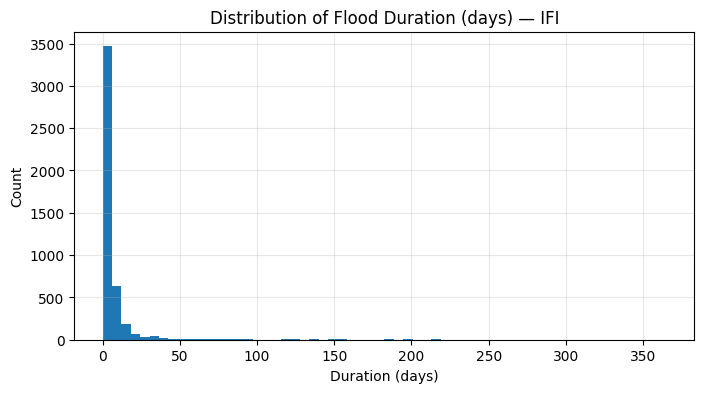

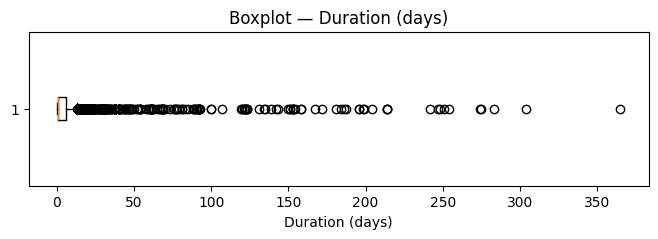

In [16]:
# Duration distribution (IFI)
plt.figure(figsize=(8,4))
plt.hist(ifi['Duration(Days)'].dropna(), bins=60)
plt.title('Distribution of Flood Duration (days) — IFI')
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

# Boxplot for Duration
plt.figure(figsize=(8,2))
plt.boxplot(ifi['Duration(Days)'].dropna(), vert=False)
plt.title('Boxplot — Duration (days)')
plt.xlabel('Duration (days)')
plt.show()

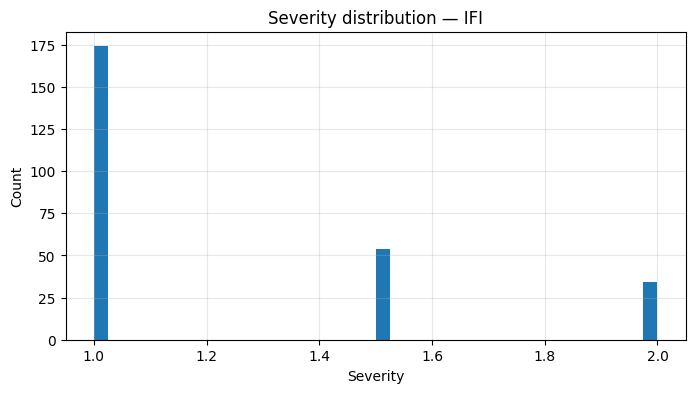

In [17]:
# Severity distribution
if 'Severity' in ifi.columns:
    plt.figure(figsize=(8,4))
    plt.hist(ifi['Severity'].dropna(), bins=40)
    plt.title('Severity distribution — IFI')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print('Severity column not present')

In [19]:
# District-level flooded area distribution
numcols = [c for c in flooded_area.columns if flooded_area[c].dtype in ['float64','int64']]
numcols
plt.figure(figsize=(8,4))
if 'Percent_flooded_area' in flooded_area.columns:
    plt.hist(flooded_area['Percent_flooded_area'].dropna(), bins=40)
    plt.title('Percent Flooded Area distribution (district)')
    plt.xlabel('Percent flooded area')
    plt.ylabel('Count')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print('Percent_flooded_area not found in flooded_area')

Percent_flooded_area not found in flooded_area


<Figure size 800x400 with 0 Axes>

## Correlation (numeric features)
We'll compute correlations and plot a heatmap using matplotlib's imshow.

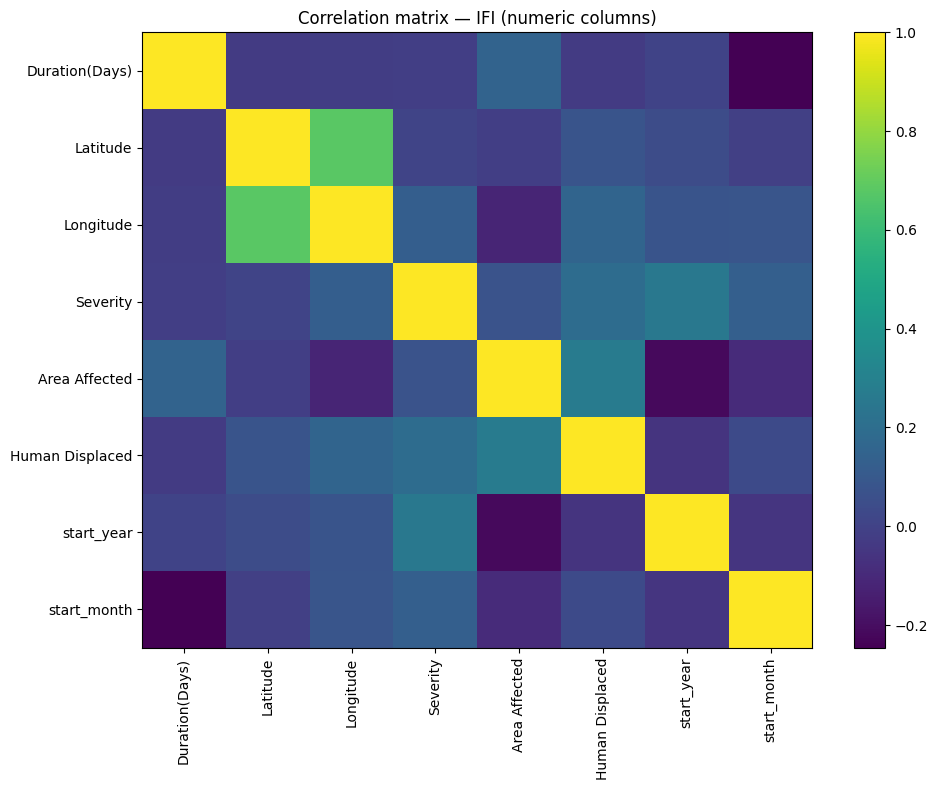

In [20]:
corr_if = numeric_if.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr_if, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title('Correlation matrix — IFI (numeric columns)')
plt.xticks(range(len(corr_if.columns)), corr_if.columns, rotation=90)
plt.yticks(range(len(corr_if.columns)), corr_if.columns)
plt.tight_layout()
plt.show()

## Top States and Districts by number of flood events

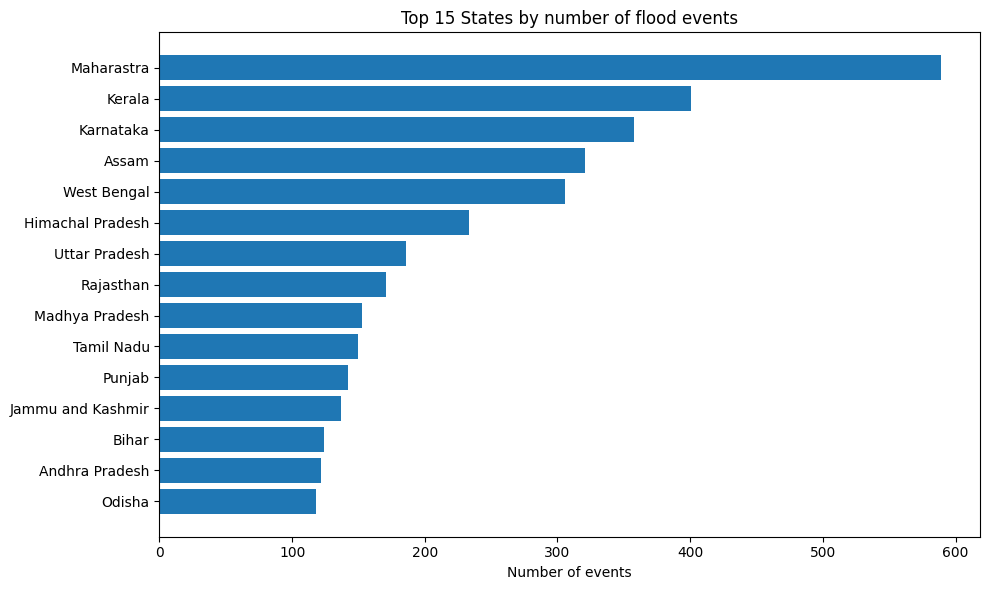

In [21]:
top_states = ifi['State'].value_counts().dropna().head(15)
plt.figure(figsize=(10,6))
plt.barh(top_states.index[::-1], top_states.values[::-1])
plt.title('Top 15 States by number of flood events')
plt.xlabel('Number of events')
plt.tight_layout()
plt.show()

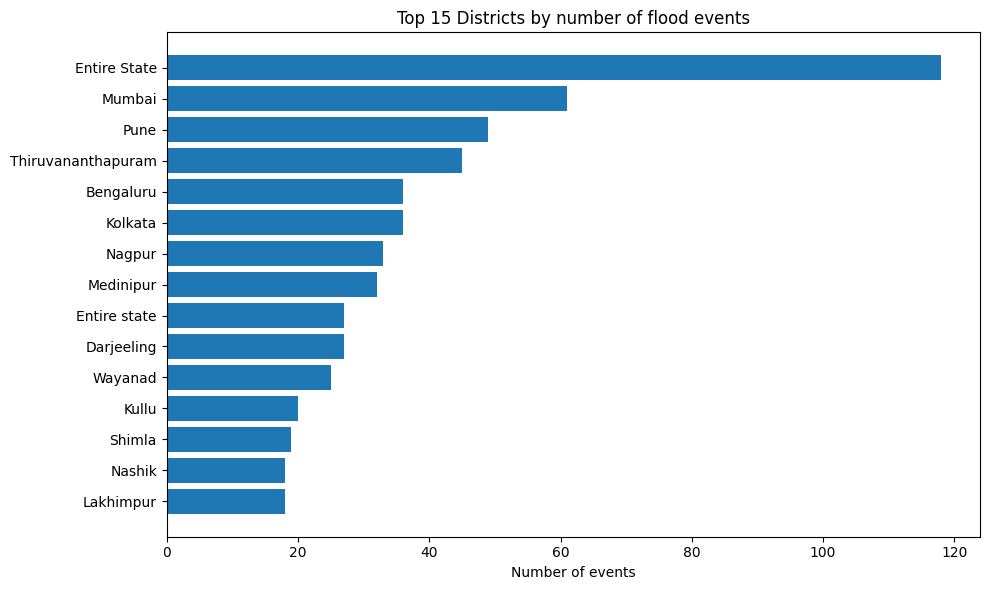

In [22]:
top_districts = ifi['Districts'].value_counts().dropna().head(15)
plt.figure(figsize=(10,6))
plt.barh(top_districts.index[::-1], top_districts.values[::-1])
plt.title('Top 15 Districts by number of flood events')
plt.xlabel('Number of events')
plt.tight_layout()
plt.show()

## Temporal trends — events per year and fatalities per year

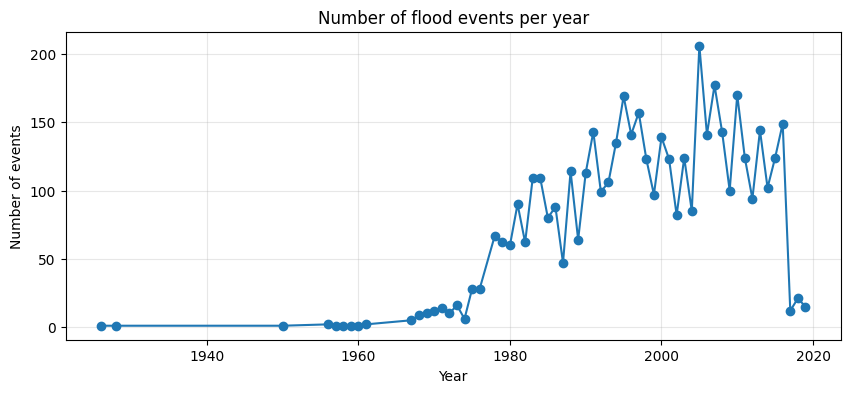

Human_fatalities not in IFI columns


In [23]:
events_per_year = ifi.groupby('start_year').size().dropna()
plt.figure(figsize=(10,4))
plt.plot(events_per_year.index, events_per_year.values, marker='o')
plt.title('Number of flood events per year')
plt.xlabel('Year')
plt.ylabel('Number of events')
plt.grid(alpha=0.3)
plt.show()

# Fatalities per year if available
if 'Human_fatalities' in ifi.columns:
    fat_year = ifi.groupby('start_year')['Human_fatalities'].sum()
    plt.figure(figsize=(10,4))
    plt.plot(fat_year.index, fat_year.values, marker='o')
    plt.title('Total Human fatalities per year (IFI)')
    plt.xlabel('Year')
    plt.ylabel('Fatalities')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print('Human_fatalities not in IFI columns')

## District-level merge and analysis

In [24]:
# Merge flooded_area and flood_impact on Dist_Name (or Dist_Name / Dist.)
common_cols = set(flooded_area.columns).intersection(flood_impact.columns)
common_cols

# try merging on district name column names
left = flooded_area.copy()
right = flood_impact.copy()
# identify likely name columns
possible_left = [c for c in left.columns if 'Dist' in c or 'Name' in c]
possible_right = [c for c in right.columns if 'Dist' in c or 'Name' in c]
possible_left, possible_right

# perform merge using 'Dist_Name' if exists
if 'Dist_Name' in left.columns and 'Dist_Name' in right.columns:
    merged = left.merge(right, on='Dist_Name', how='outer', suffixes=('_area','_impact'))
else:
    # attempt merge by index
    merged = left.merge(right, left_index=True, right_index=True, how='outer', suffixes=('_area','_impact'))

print('Merged shape:', merged.shape)
merged.head()

Merged shape: (744, 8)


,Dist_Name,Percent_Flooded_Area,Parmanent_Water,Corrected_Percent_Flooded_Area,Human_fatality,Human_injured,Population,Mean_Flood_Duration
0,Adilabad,1.209759,0.221044,0.988715,174,0,802880,8.0
1,Agar Malwa,0.536889,0.338892,0.197996,2,0,702666,6.0
2,Agra,4.133356,0.101930,4.031427,133,32,5296620,20.0
3,Ahmadabad,4.222293,0.122458,4.099835,177,23,8738876,12.0
4,Ahmadnagar,0.691348,0.697617,0.006269,50,18,5113145,4.0


In [26]:
# Correlation between percent flooded area and human impact (if available)
if 'Percent_flooded_area' in merged.columns and 'Human_fatality' in merged.columns:
    sub = merged[['Percent_flooded_area','Human_fatality','Population']].dropna()
    print('Correlation:')
    print(sub.corr())
    plt.figure(figsize=(6,4))
    plt.scatter(sub['Percent_flooded_area'], sub['Human_fatality'])
    plt.xlabel('Percent flooded area')
    plt.ylabel('Human fatalities')
    plt.title('Percent flooded area vs Human fatalities (district)')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print('Required columns missing for correlation plot')

Required columns missing for correlation plot


## Normalize human impact by population

In [31]:
if 'Human_fatality' in merged.columns and 'Population' in merged.columns:
    merged['fatal_per_100k'] = merged['Human_fatality'] / merged['Population'] * 100000
    top_fatal = merged.sort_values('fatal_per_100k', ascending=False).head(15)
    top_fatal[['Dist_Name','Human_fatality','Population','fatal_per_100k']]
else:
    print('Columns not present to compute normalized fatalities')

In [32]:
# Select the specified columns
selected_cols = ['Severity', 'Area Affected', 'Human Displaced']
ifi_subset = ifi[selected_cols]

# Create a new DataFrame containing only the rows where at least one of these selected columns has a non-null value
ifi_with_impact = ifi_subset.dropna(how='all')

# Display the first few rows and the shape of this new DataFrame
print("DataFrame with non-null values in Severity, Area Affected, or Human Displaced:")
display(ifi_with_impact.head())
print("\nShape of the new DataFrame:", ifi_with_impact.shape)

# Calculate and print the percentage of missing values for the selected columns in the original ifi DataFrame
print('\nMissing values (%) in original IFI for selected columns:')
miss_selected = ifi[selected_cols].isnull().mean() * 100
print(miss_selected[miss_selected > 0].sort_values(ascending=False))

# Calculate and print the mean of 'Area Affected' for demonstration of simple imputation
if 'Area Affected' in ifi.columns:
    mean_area_affected = ifi['Area Affected'].mean()
    print(f"\nMean of 'Area Affected' (for imputation demonstration): {mean_area_affected:.2f}")
else:
    print("\n'Area Affected' column not found in original IFI DataFrame.")

DataFrame with non-null values in Severity, Area Affected, or Human Displaced:


,Severity,Area Affected,Human Displaced
0,1.0,254234.60,25000.0
1,1.0,117441.17,20000.0
2,2.0,89994.67,152000.0
3,2.0,46758.64,150000.0
4,1.0,507167.44,3040000.0



Shape of the new DataFrame: (262, 3)

Missing values (%) in original IFI for selected columns:
Severity           94.470241
Area Affected      94.470241
Human Displaced    94.470241
dtype: float64

Mean of 'Area Affected' (for imputation demonstration): 161338.81


Columns in flooded_area: Index(['Dist_Name', 'Percent_Flooded_Area', 'Parmanent_Water',
       'Corrected_Percent_Flooded_Area'],
      dtype='object')


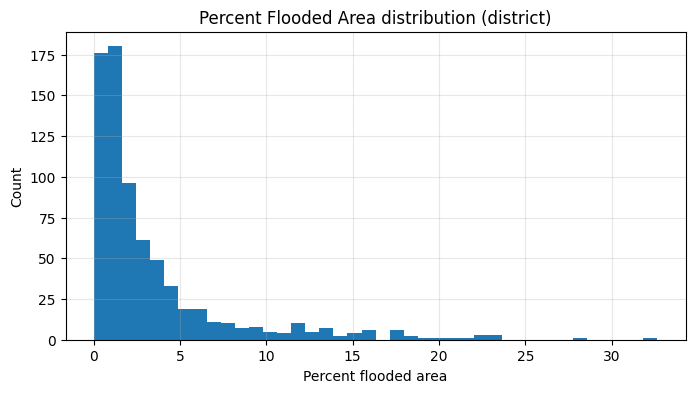

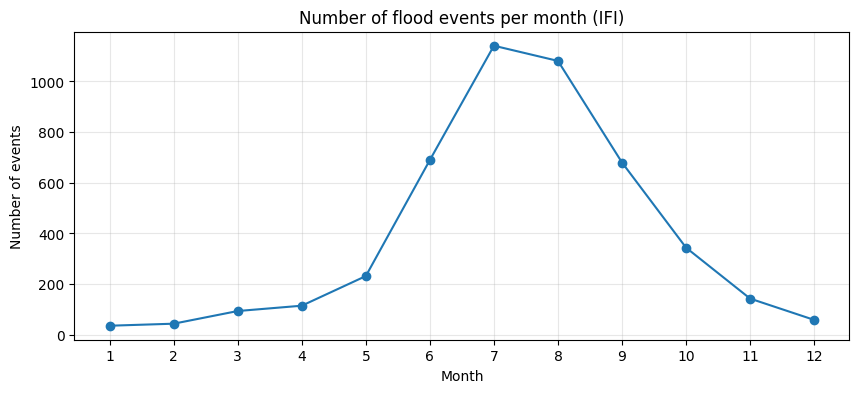

In [38]:
# Step 1 & 2: Correct column name and plot distribution for flooded_area
# Identify the correct column name for percentage of flooded area
print("Columns in flooded_area:", flooded_area.columns)
# Based on the previous outputs, the correct column name is 'Percent_Flooded_Area'

plt.figure(figsize=(8,4))
plt.hist(flooded_area['Percent_Flooded_Area'].dropna(), bins=40)
plt.title('Percent Flooded Area distribution (district)')
plt.xlabel('Percent flooded area')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

# Step 3, 4 & 5: Extract month, count events per month, and plot for ifi
# Extract the month from the 'Start Date' column
ifi['start_month'] = ifi['Start Date'].dt.month

# Group by 'start_month' and count events
events_per_month = ifi.groupby('start_month').size().dropna()

# Create a line plot of events per month
plt.figure(figsize=(10,4))
plt.plot(events_per_month.index, events_per_month.values, marker='o')
plt.title('Number of flood events per month (IFI)')
plt.xlabel('Month')
plt.ylabel('Number of events')
plt.xticks(range(1, 13)) # Ensure all months are shown on the x-axis
plt.grid(alpha=0.3)
plt.show()

## Deepen bivariate analysis

### Subtask:
Further analyze the correlation between flooded area and human impact using the `merged` dataframe. This could involve scatter plots with additional variables or exploring relationships between categorical and numerical features.


**Reasoning**:
Identify the relevant columns in the merged DataFrame and create scatter plots to visualize the relationship between flooded area and human impact, as well as print the correlation matrix for the selected numerical columns.



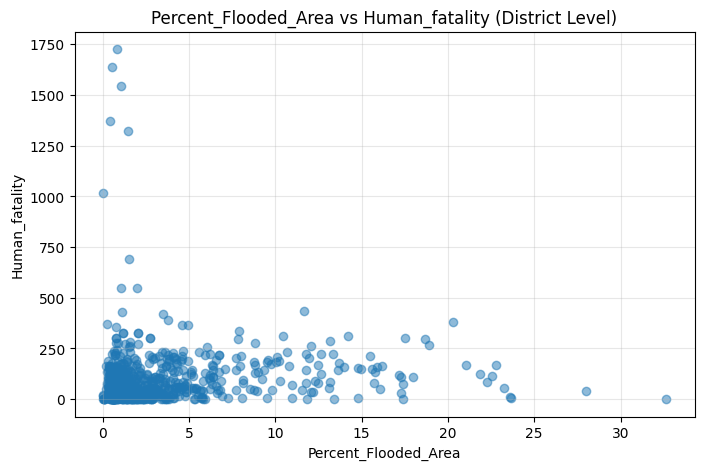

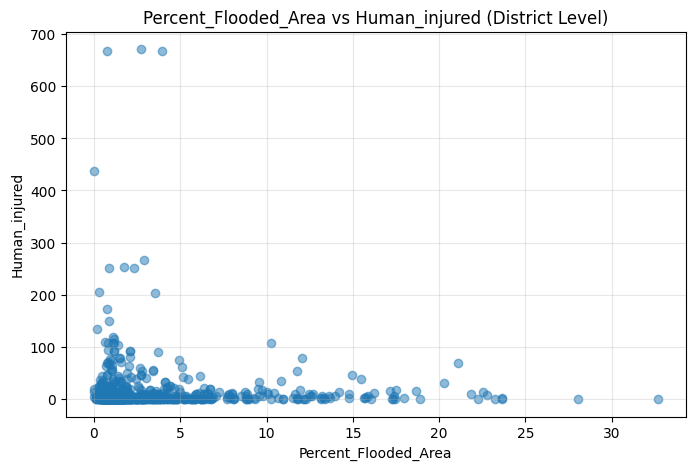

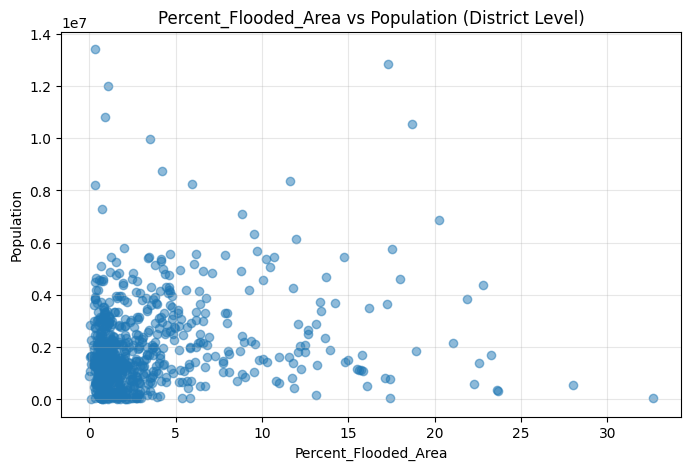

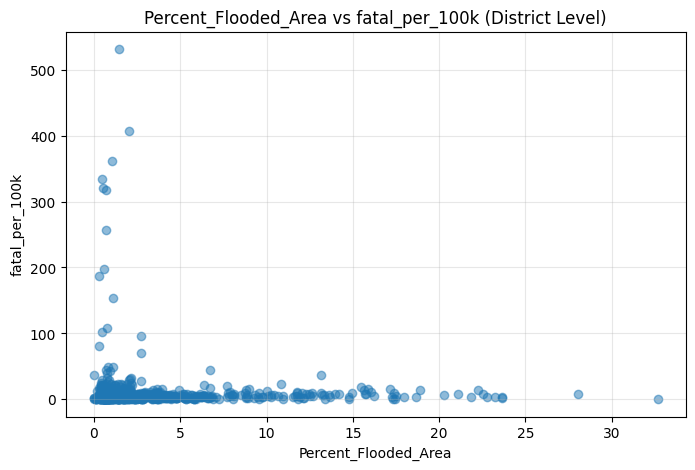

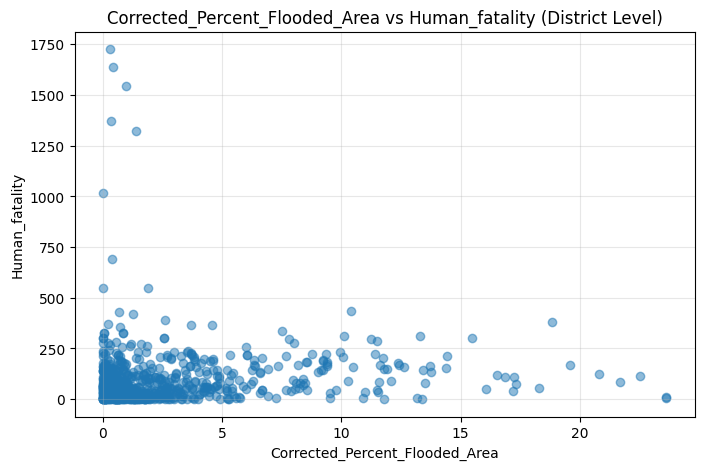

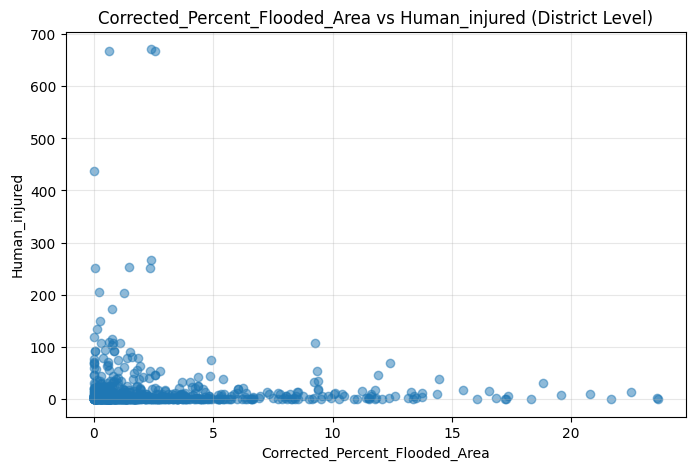

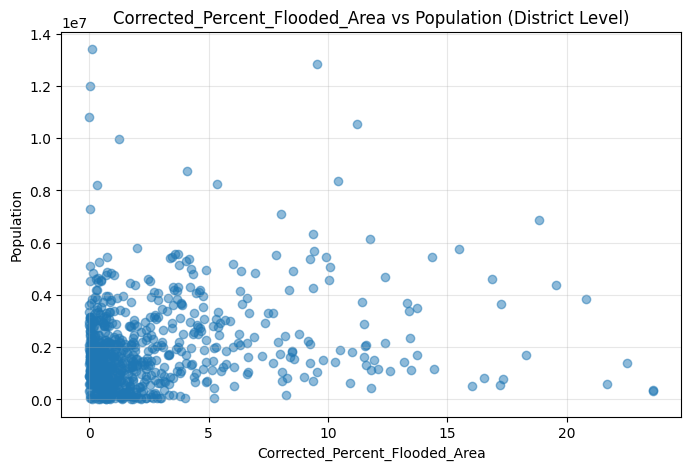

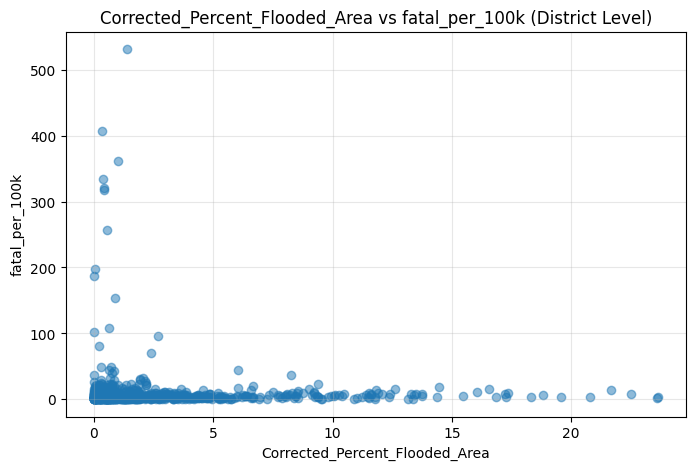


Correlation matrix for selected columns in merged DataFrame:


,Percent_Flooded_Area,Corrected_Percent_Flooded_Area,Human_fatality,Human_injured,Population,fatal_per_100k
Percent_Flooded_Area,1.000000,0.921276,0.088960,-0.042937,0.194773,-0.057497
Corrected_Percent_Flooded_Area,0.921276,1.000000,0.082020,-0.053354,0.197253,-0.059042
Human_fatality,0.088960,0.082020,1.000000,0.221128,0.278049,0.545689
Human_injured,-0.042937,-0.053354,0.221128,1.000000,0.060829,0.151856
Population,0.194773,0.197253,0.278049,0.060829,1.000000,-0.155065
fatal_per_100k,-0.057497,-0.059042,0.545689,0.151856,-0.155065,1.000000


In [34]:
# Identify relevant columns in the merged DataFrame
flooded_area_cols = ['Percent_Flooded_Area', 'Corrected_Percent_Flooded_Area']
human_impact_cols = ['Human_fatality', 'Human_injured', 'Population', 'fatal_per_100k']

# Create scatter plots
for area_col in flooded_area_cols:
    for impact_col in human_impact_cols:
        if area_col in merged.columns and impact_col in merged.columns:
            plt.figure(figsize=(8, 5))
            plt.scatter(merged[area_col], merged[impact_col], alpha=0.5)
            plt.title(f'{area_col} vs {impact_col} (District Level)')
            plt.xlabel(area_col)
            plt.ylabel(impact_col)
            plt.grid(alpha=0.3)
            plt.show()
        else:
            print(f"Columns {area_col} or {impact_col} not found in merged DataFrame. Skipping plot.")

# Print the correlation matrix for selected numerical columns in merged
selected_numeric_cols = flooded_area_cols + human_impact_cols
numeric_merged = merged[selected_numeric_cols].select_dtypes(include=np.number)

if not numeric_merged.empty:
    print('\nCorrelation matrix for selected columns in merged DataFrame:')
    display(numeric_merged.corr())
else:
    print('\nNo numeric columns found for correlation matrix in selected columns.')

## Analyze categorical features

### Subtask:
Visualize the distribution of `Main Cause` and `Event Source` in the `IFI` dataset using bar plots.


**Reasoning**:
Calculate and visualize the distribution of 'Main Cause' and 'Event Source' using bar plots as requested by the subtask.



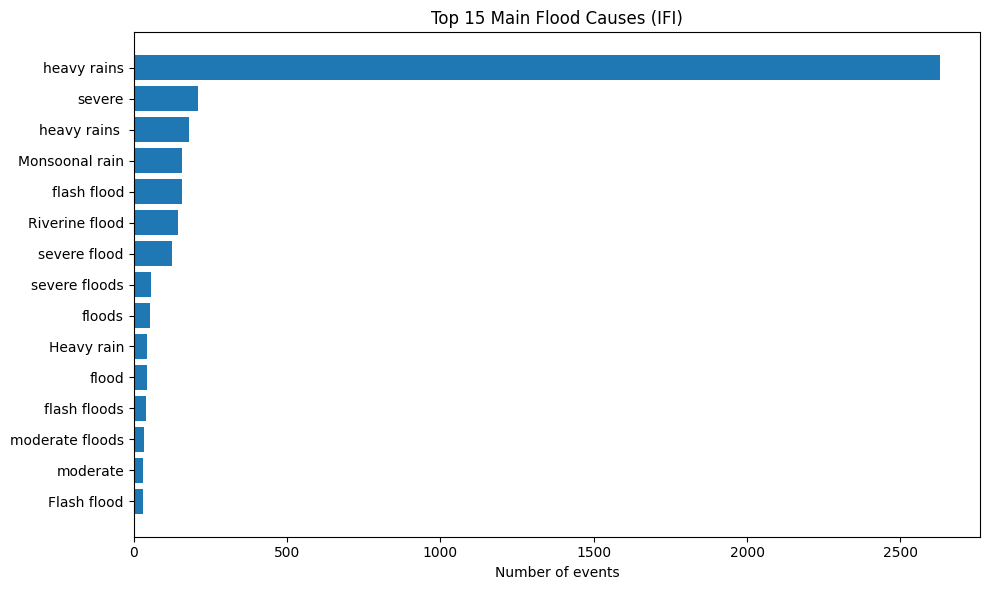

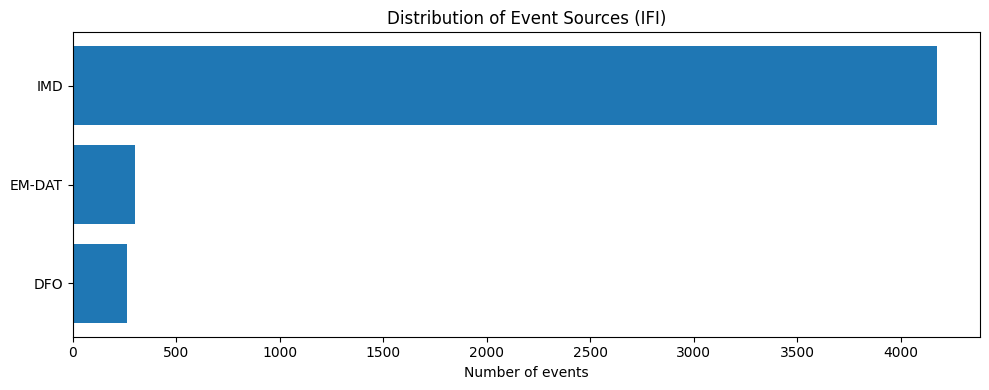

In [35]:
# Calculate value counts for 'Main Cause' and plot
main_cause_counts = ifi['Main Cause'].value_counts().dropna().head(15)
plt.figure(figsize=(10, 6))
plt.barh(main_cause_counts.index[::-1], main_cause_counts.values[::-1])
plt.title('Top 15 Main Flood Causes (IFI)')
plt.xlabel('Number of events')
plt.tight_layout()
plt.show()

# Calculate value counts for 'Event Source' and plot
event_source_counts = ifi['Event Source'].value_counts().dropna()
plt.figure(figsize=(10, 4))
plt.barh(event_source_counts.index[::-1], event_source_counts.values[::-1])
plt.title('Distribution of Event Sources (IFI)')
plt.xlabel('Number of events')
plt.tight_layout()
plt.show()


Scatter plots for related IFI numerical columns:


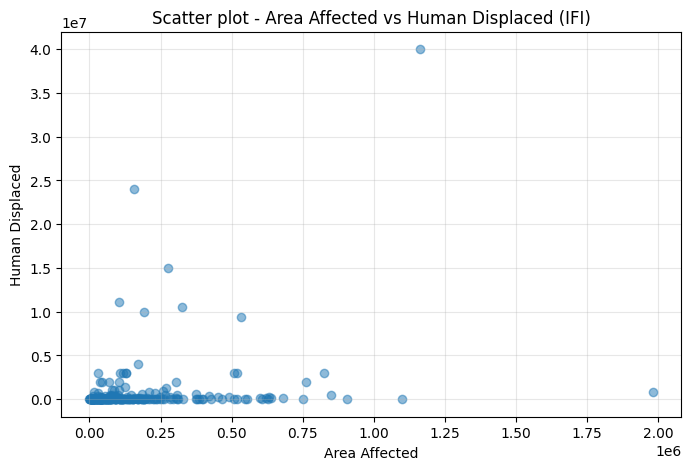

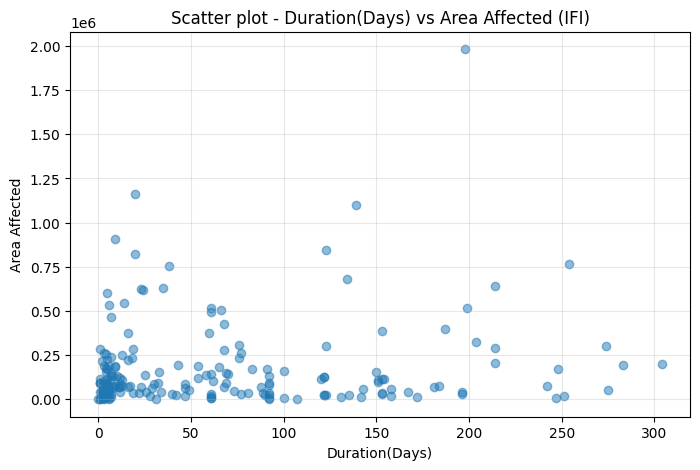

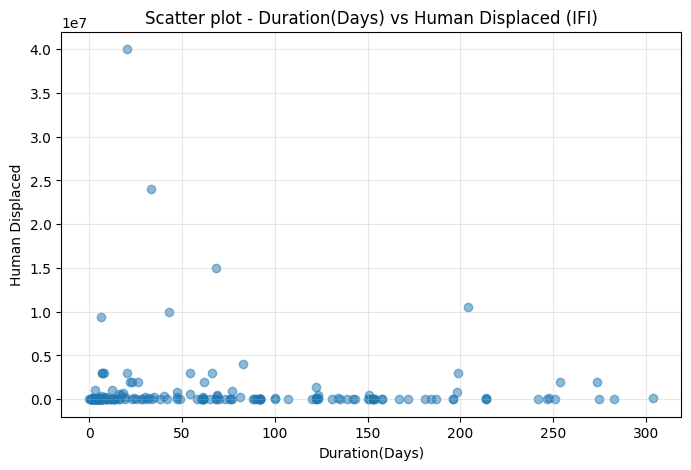


Scatter plots for related Merged numerical columns:


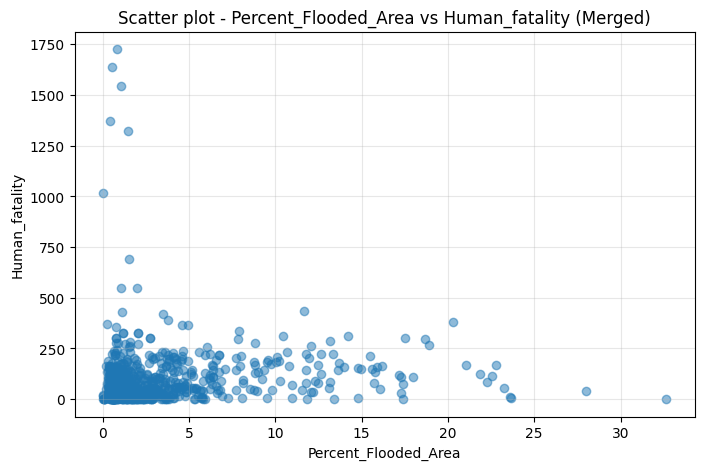

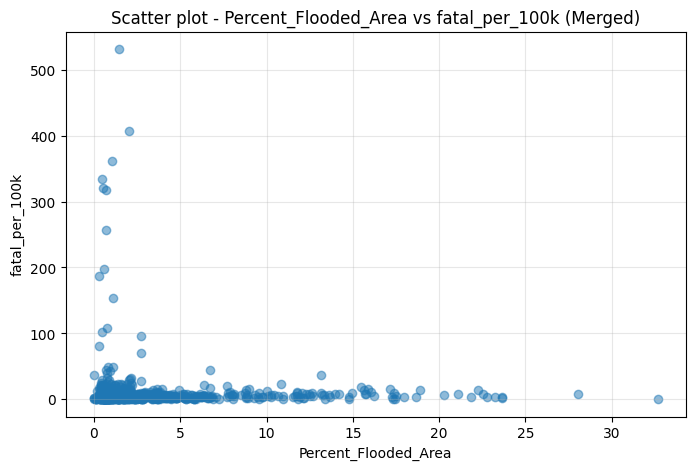

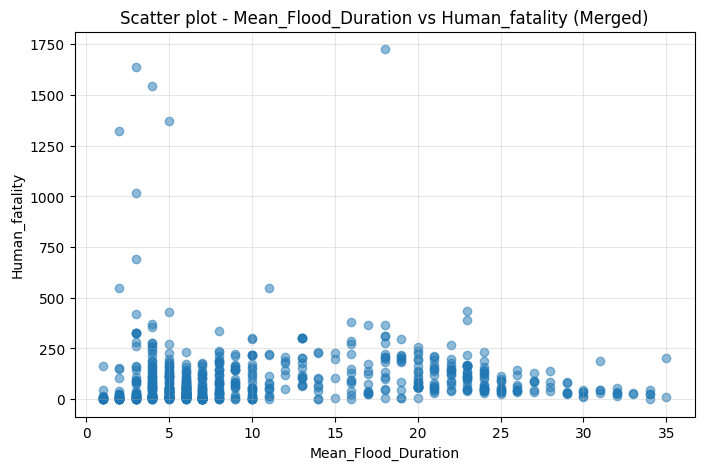

In [37]:
# Generate scatter plots for related columns in IFI
print("\nScatter plots for related IFI numerical columns:")
ifi_scatter_pairs = [('Area Affected', 'Human Displaced'),
                     ('Duration(Days)', 'Area Affected'),
                     ('Duration(Days)', 'Human Displaced')]

for x_col, y_col in ifi_scatter_pairs:
    if x_col in ifi.columns and y_col in ifi.columns:
        # Convert object type columns to numeric, coercing errors to NaN
        if ifi[x_col].dtype == 'object':
            temp_x = pd.to_numeric(ifi[x_col], errors='coerce')
        else:
            temp_x = ifi[x_col]

        if ifi[y_col].dtype == 'object':
            temp_y = pd.to_numeric(ifi[y_col], errors='coerce')
        else:
            temp_y = ifi[y_col]

        # Drop rows where either column is NaN
        scatter_data = pd.DataFrame({x_col: temp_x, y_col: temp_y}).dropna()

        if not scatter_data.empty:
            plt.figure(figsize=(8, 5))
            plt.scatter(scatter_data[x_col], scatter_data[y_col], alpha=0.5)
            plt.title(f'Scatter plot - {x_col} vs {y_col} (IFI)')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.grid(alpha=0.3)
            plt.show()
        else:
            print(f"Skipping scatter plot for '{x_col}' vs '{y_col}' in IFI due to no valid data points.")
    else:
        print(f"Columns '{x_col}' or '{y_col}' not found in IFI.")


# Generate scatter plots for related columns in merged
print("\nScatter plots for related Merged numerical columns:")
merged_scatter_pairs = [('Percent_Flooded_Area', 'Human_fatality'),
                        ('Percent_Flooded_Area', 'fatal_per_100k'),
                        ('Mean_Flood_Duration', 'Human_fatality')]

for x_col, y_col in merged_scatter_pairs:
    if x_col in merged.columns and y_col in merged.columns:
        scatter_data = merged[[x_col, y_col]].dropna()
        if not scatter_data.empty:
            plt.figure(figsize=(8, 5))
            plt.scatter(scatter_data[x_col], scatter_data[y_col], alpha=0.5)
            plt.title(f'Scatter plot - {x_col} vs {y_col} (Merged)')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.grid(alpha=0.3)
            plt.show()
        else:
            print(f"Skipping scatter plot for '{x_col}' vs '{y_col}' in Merged due to no valid data points.")
    else:
        print(f"Columns '{x_col}' or '{y_col}' not found in Merged.")